In [231]:
#$conda activate py37
#(py37)$ jupyter notebook 

In [232]:
# %config IPCompleter.greedy=True

In [233]:
#press [SHIFT] and [TAB] from within the method parentheses

### intellisense - works perfect!! -> excute in command line windows. : (py37) $ -> works perfect !!
# (py37) $pip3 install jupyter-tabnine
# (py37) $sudo jupyter nbextension install --py jupyter_tabnine

# (py37) $jupyter nbextension enable jupyter_tabnine --py
##### jupyter nbextension enable --py jupyter_tabnine ##instead above line excuted. 

# (py37) $jupyter serverextension enable --py jupyter_tabnine

#--> I installed in (py37) conda env.

# Time Series

In [234]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
# PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [235]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2020, 1, 22, 13, 30, 42, 639296)

In [236]:
now.year, now.month, now.day

(2020, 1, 22)

In [237]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [238]:
delta.days

926

In [239]:
delta.seconds

56700

In [240]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)  #datetime.timedelta -> 12 day forward.

datetime.datetime(2011, 1, 19, 0, 0)

In [241]:
start - 2 * timedelta(12) #24 day back

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime
 %F : Shortcut for %Y-%m-%d (e.g., 2012-4-18 ),%D: Shortcut for %m/%d/%y (e.g., 04/18/12 )
* stamp.strftime('%Y-%m-%d')
* from dateutil.parser import parse : parse('2011-01-03')
* pd.to_datetime(datestrs)

In [242]:
# stamp = datetime(2020, 1, 14)
stamp = datetime(2020, 1, 14, 20, 15)
str(stamp)

'2020-01-14 20:15:00'

In [243]:
stamp.strftime('%Y-%m-%d') #%Y 4digit year

'2020-01-14'

In [244]:
stamp.strftime('%y-%m-%d-%H-%M-%S') #%y 2 digit year m: 2 digit month, M: minute, H:24hour, I: 12hour

'20-01-14-20-15-00'

In [245]:
stamp.strftime('%y-%m-%d-%I-%M-%S') #%y 2 digit year m: 2 digit month, M: minute, H:24hour, I: 12hour

'20-01-14-08-15-00'

time.strptime :convert strings to dates using date

In [246]:
value = '2011-01-03' #string
datetime.strptime(value, '%Y-%m-%d') #datetime : need to write format spec such as '%Y-%m-%d'

datetime.datetime(2011, 1, 3, 0, 0)

In [247]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [248]:
#no need format spec such as '%Y-%m-%d', especially for common date formats.
from dateutil.parser import parse 
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [249]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [250]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [251]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [252]:
#handles values that should be considered missing ( None , empty string, etc.):
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [253]:
idx[2]

NaT

In [254]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [255]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [256]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [257]:
#index(1,3,5) : number + missing value -> NaN, index(0,2,4): number+number -> number
ts + ts[::2] 

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [258]:
ts.index.dtype

dtype('<M8[ns]')

A Timestamp can be substituted anywhere you would use a datetime object. Addi‐
tionally, it can store frequency information (if any) and understands how to do time
zone conversions and other kinds of manipulations.

In [259]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting
* Time series behaves like any other pandas.Series when you are indexing and selecting data based on label:

In [260]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [261]:
ts['1/10/2011']

1.9657805725027142

In [262]:
ts['20110110']

1.9657805725027142

pd.date_range

In [263]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

* For longer time series, a **year** or only a **year and month** can be passed to easily select
slices of data:
* the string '2001' is interpreted as a year and selects that time period. This also
works if you specify the month:

In [264]:
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [265]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [266]:
# Slicing with datetime objects works as well:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [267]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [268]:
#slice with timestamps not contained in a time series to perform a range query:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [269]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

``pd.date_range(start ='1-1-2018',  
         end ='1-05-2018', freq ='5H') 
pd.date_range(start ='1-1-2018', 
           end ='8-01-2018', freq ='M') 
pd.date_range(start ='1-1-2018',  
         end ='11-01-2018', freq ='3M')
pd.date_range(start ='1-1-2018', periods = 13) 
pd.date_range(start ='01-03-2017',  
            end ='1-1-2018', periods = 13) 
pd.date_range(start ='1-1-2018',  
       periods = 13, tz ='Asia / Tokyo') ``

In [270]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') #wed only
# dates = pd.date_range('1/1/2000', periods=100, freq='M') #MonthEnd

print(len(dates))
dates

100


DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [271]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
print(long_df.shape)
long_df.head()

(100, 4)


,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372


In [272]:
long_df.loc['5-2001'] #indexing on its rows:
# long_df.loc['2001-5'] #indexing on its rows:  same as above

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices

In [273]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [274]:
dup_ts.index.is_unique

False

In [275]:
dup_ts['1/3/2000']  # not duplicated

4

In [276]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [277]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [278]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [279]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

resample('D'): sample time series to be fixed daily frequency

In [280]:
resampler = ts.resample('D') #DatetimeIndexResampler -> contiguous day with blank days
list(resampler)

[(Timestamp('2011-01-02 00:00:00', freq='D'), 2011-01-02   -0.204708
  dtype: float64),
 (Timestamp('2011-01-03 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-04 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-05 00:00:00', freq='D'), 2011-01-05    0.478943
  dtype: float64),
 (Timestamp('2011-01-06 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-07 00:00:00', freq='D'), 2011-01-07   -0.519439
  dtype: float64),
 (Timestamp('2011-01-08 00:00:00', freq='D'), 2011-01-08   -0.55573
  dtype: float64),
 (Timestamp('2011-01-09 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-10 00:00:00', freq='D'), 2011-01-10    1.965781
  dtype: float64),
 (Timestamp('2011-01-11 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-12 00:00:00', freq='D'), 2011-01-12    1.393406
  dtype: float64)]

### Generating Date Ranges

In [281]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [282]:
pd.date_range(start='2012-04-01', periods=20)


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [283]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

#### BM: business end of month,M: month end, D: day, B:Biz Day, H: hour, T: minute

In [284]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') 

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [285]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [286]:
# generate a set of timestamps normalized to midnight as a convention.
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets: 
* Frequencies: base frequency('M' for monthly or 'H' for hourly.) and a multiplier.
* ``from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd``

In [287]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour() #base frequency: hour
hour

<Hour>

In [288]:
four_hours = Hour(4) #offset is 4 hour
four_hours

<4 * Hours>

never need to explicitly create one of these objects,
instead using a string alias like 'H' or '4H'

In [289]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [290]:
# Many offsets can be combined together by addition:
Hour(2) + Minute(30)

<150 * Minutes>

In [291]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [292]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') #get dates like the third Friday of each month:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [293]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [294]:
ts.shift(2) #move forward two index

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

In [295]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

shift is computing percent changes in a time series or multiple
time series as DataFrame columns.
* (ts - ts.shift(1)) / ts.shift(1)

In [296]:
# percent changes in a time series : (ts - ts.shift(1)) / ts.shift(1)
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29   -13.564241
2000-03-31    -1.139975
2000-04-30     3.410958
Freq: M, dtype: float64

if the
frequency is known, it can be passed to shift to advance the timestamps instead of
simply the data:

In [297]:
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [298]:
ts.shift(2, freq='M') #index, datatime is sifted by 2 instead of value

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [299]:
ts.shift(3, freq='D') # index sifted 3 days forward

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

In [300]:
ts.shift(1, freq='90T') #T: minute, 90 minutes forward.(1h : 30min)

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
Freq: M, dtype: float64

#### Shifting dates with offsets

In [301]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [302]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [303]:
now + MonthEnd(2) # forward 2 moth end.

Timestamp('2011-12-31 00:00:00')

In [304]:
offset = MonthEnd()
offset.rollforward(now) #this month end

Timestamp('2011-11-30 00:00:00')

In [305]:
offset.rollback(now) #previous month end

Timestamp('2011-10-31 00:00:00')

In [306]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(len(ts))
ts

20


2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [307]:
ts.groupby(offset.rollforward).mean() #groupby(MonthEnd and this month -> this month end) 

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [308]:
# ts.resample('M') -> month end
ts.resample('M').mean() #same as above

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## Time Zone Handling

In [309]:
datetime.now()

datetime.datetime(2020, 1, 22, 13, 30, 43, 705065)

In [310]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [311]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [312]:
 pytz.timezone('US/Pacific')

<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>

### Time Zone Localization and Conversion

In [313]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [314]:
ts = pd.Series(np.random.randn(len(rng)), index=rng) #len(rng):6
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [315]:
print(ts.index.tz)

None


In [316]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D')

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-17 09:30:00', '2012-03-18 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [317]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [318]:
#test
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='US/Pacific')

DatetimeIndex(['2012-03-09 09:30:00-08:00', '2012-03-10 09:30:00-08:00',
               '2012-03-11 09:30:00-07:00', '2012-03-12 09:30:00-07:00',
               '2012-03-13 09:30:00-07:00', '2012-03-14 09:30:00-07:00',
               '2012-03-15 09:30:00-07:00', '2012-03-16 09:30:00-07:00',
               '2012-03-17 09:30:00-07:00', '2012-03-18 09:30:00-07:00'],
              dtype='datetime64[ns, US/Pacific]', freq='D')

In [319]:
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [320]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [321]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [322]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [323]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
Freq: D, dtype: float64

In [324]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
Freq: D, dtype: float64

In [325]:
print(type(ts.index))
ts.index.tz_localize('Asia/Shanghai')

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone−Aware Timestamp Objects

In [326]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [327]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [328]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [329]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [330]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [331]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [332]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [333]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [334]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones -> Result in UTC.

In [335]:
#BM: business end of month,M: month end, D: day, B:Biz Day, H: hour, T: minute
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [336]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00    0.522356
2012-03-08 09:30:00+00:00   -0.546348
2012-03-09 09:30:00+00:00   -0.733537
2012-03-12 09:30:00+00:00    1.302736
2012-03-13 09:30:00+00:00    0.022199
2012-03-14 09:30:00+00:00    0.364287
2012-03-15 09:30:00+00:00   -0.922839
Freq: B, dtype: float64

In [337]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -0.733537
2012-03-12 13:30:00+04:00    1.302736
2012-03-13 13:30:00+04:00    0.022199
2012-03-14 13:30:00+04:00    0.364287
2012-03-15 13:30:00+04:00   -0.922839
Freq: B, dtype: float64

In [338]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -1.467074
2012-03-12 09:30:00+00:00    2.605472
2012-03-13 09:30:00+00:00    0.044397
2012-03-14 09:30:00+00:00    0.728575
2012-03-15 09:30:00+00:00   -1.845677
Freq: B, dtype: float64

In [339]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic
* Periods represent timespans, like days, months, quarters, or years
    * pd.Period(2007, freq='A-DEC'): full timespan from January 1, 2007, to December 31, 2007, inclusive.
    * pd.Period('2014', freq='A-DEC')

In [340]:
#  from January 1, 2007, to December 31, 2007, inclusive.
p = pd.Period(2007, freq='A-DEC')#A-JAN, A-FEB...YearEnd(Annual dates anchored on last calendar day of given month)
p

Period('2007', 'A-DEC')

In [341]:
p + 5 #full timespan from January 1, 2012, to December 31, 2007, inclusive.

Period('2012', 'A-DEC')

In [342]:
p - 2

Period('2005', 'A-DEC')

In [343]:
# If two periods have the same frequency, their difference is the number of units
# between them:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

pd.period_range(): Regular ranges of periods

In [344]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [345]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [346]:
# Quarterly dates anchored on last calendar day of each month, for year ending in indicated month
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')#Q-JAN, Q-FEB, ...QuarterEnd
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion - p.asfreq('M', 'start'), p.asfreq('M', 'end')
* Periods and PeriodIndex objects can be converted to another frequency with their
**asfreq** method.
* Period('2007', 'A-DEC') as being a sort of cursor pointing to a
span of time, subdivided by monthly periods.

In [347]:
#we had an annual period and wanted to convert it into a monthly period either at the start or end of the year.
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [348]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [349]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

* For a fiscal year ending on a month other than December, the corresponding
monthly subperiods are different:

In [350]:
p = pd.Period('2007', freq='A-JUN') #fiscal year end anchored at Jun 2007, so start is 2006-7, end:2007-6
p

Period('2007', 'A-JUN')

In [351]:
p.asfreq('M', 'start')


Period('2006-07', 'M')

In [352]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

When you are converting from high to low frequency, pandas determines the super‐
period depending on where the subperiod “belongs.”

In [353]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [354]:
# A-JUN frequency, the month Aug-2007 is actually part of the 2008 period
p.asfreq('A-JUN')
p

Period('2007-08', 'M')

PeriodIndex objects or time series conversion: asfeq()

In [355]:
rng = pd.period_range('2012', '2020', freq='A-DEC')#from 1-1 to 12-31
rng

PeriodIndex(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
             '2020'],
            dtype='period[A-DEC]', freq='A-DEC')

In [356]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012    1.607578
2013    0.200381
2014   -0.834068
2015   -0.302988
2016    1.663261
2017   -0.996206
2018    1.521760
2019    0.244175
2020    0.423331
Freq: A-DEC, dtype: float64

In [357]:
ts.asfreq('M', how='start')

2012-01    1.607578
2013-01    0.200381
2014-01   -0.834068
2015-01   -0.302988
2016-01    1.663261
2017-01   -0.996206
2018-01    1.521760
2019-01    0.244175
2020-01    0.423331
Freq: M, dtype: float64

In [358]:
ts.asfreq('B', how='end') #biz day- end of month

2012-12-31    1.607578
2013-12-31    0.200381
2014-12-31   -0.834068
2015-12-31   -0.302988
2016-12-30    1.663261
2017-12-29   -0.996206
2018-12-31    1.521760
2019-12-31    0.244175
2020-12-31    0.423331
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [359]:
p = pd.Period('2012Q4', freq='Q-JAN') #quater fiscal year end: Jan 31(Q4)
p

Period('2012Q4', 'Q-JAN')

In [360]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [361]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [362]:
#test: Start by creating a series with 4 one minute timestamps
index_t1 = pd.date_range('1/1/2000', periods=4, freq='T')
series_t1 = pd.Series([0.0, None, 2.0, 3.0], index=index_t1)
df_t1 = pd.DataFrame({'s':series_t1})
df_t1

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


In [363]:
#test :Upsample the series into 30 second bins.
df_t1.asfreq(freq='30S')

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,NaN
2000-01-01 00:03:00,3.0


In [364]:
# get the timestamp at 4PM on the second-to-last business day of the quarter
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 #T: min, s: second -> 16h(4pm) * 60min : unit(min)
p4pm

Period('2012-01-30 16:00', 'T')

In [365]:
p4pm.to_timestamp() #convert from period to timestamp: period_name.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [366]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [367]:
# get the timestamp at 4PM on the second-to-last business day of the quarter
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 #16h, 60 min
# new_rng = (rng.asfreq('B') - 1).asfreq('T', 's') + 16 * 60 #16h, 60 min
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [368]:
# get the timestamp at 4PM on the second-to-last business day of the quarter
# new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 #16h, 60 min
new_rng = (rng.asfreq('B') - 1).asfreq('T', 's') + 16 * 60 #16h, 60 min
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods: ts.to_period(),  (and Back to Timestamp: pts.to_timestamp(how='end'))

In [369]:
rng = pd.date_range('2000-01-01', periods=3, freq='M') #timestamp : end of month
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.654040
2000-02-29    2.089154
2000-03-31   -0.060220
Freq: M, dtype: float64

In [370]:
pts = ts.to_period()
pts #period : month

2000-01   -0.654040
2000-02    2.089154
2000-03   -0.060220
Freq: M, dtype: float64

In [371]:
# rng = pd.date_range('1/29/2000', periods=6, freq='D') #time stamp: end of day
rng = pd.date_range('1/29/2000', periods=2, freq='D') #time stamp: end of day

# ts2 = pd.Series(np.random.randn(6), index=rng)
ts2 = pd.Series(np.random.randn(2), index=rng)

ts2

2000-01-29   -0.167933
2000-01-30    0.631634
Freq: D, dtype: float64

In [372]:
ts2.to_period('M')

2000-01   -0.167933
2000-01    0.631634
Freq: M, dtype: float64

In [373]:
#test
ts2.to_period('H')

2000-01-29 00:00   -0.167933
2000-01-30 00:00    0.631634
Freq: H, dtype: float64

In [374]:
# To convert back to timestamps, use to_timestamp
pts = ts2.to_period()
pts

2000-01-29   -0.167933
2000-01-30    0.631634
Freq: D, dtype: float64

In [375]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.167933
2000-01-30 23:59:59.999999999    0.631634
dtype: float64

### Creating a PeriodIndex from Arrays

In [376]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [377]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [378]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [379]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [380]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [381]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling(ts.resample('M').mean()) and Frequency Conversion(ts.resample('M', kind='period').mean())

### resample() : similar API to groupby ; call resample to group the data, then call an aggregation function:

In [382]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.594313
2000-01-02   -1.519937
2000-01-03    1.108752
2000-01-04    1.255853
2000-01-05   -0.024330
                ...   
2000-04-05    0.789740
2000-04-06    0.937568
2000-04-07   -2.253294
2000-04-08   -1.772919
2000-04-09   -0.896431
Freq: D, Length: 100, dtype: float64

Resampling: converting a time series from one frequency to another.

In [383]:
ts.resample('M').mean()

2000-01-31   -0.224853
2000-02-29    0.099109
2000-03-31    0.190351
2000-04-30    0.018843
Freq: M, dtype: float64

In [384]:
ts.resample('M', kind='period').mean()

2000-01   -0.224853
2000-02    0.099109
2000-03    0.190351
2000-04    0.018843
Freq: M, dtype: float64

### Downsampling
*Aggregating higher frequency data to lower frequency

In [385]:
rng = pd.date_range('2000-01-01', periods=12, freq='T') #feq : 1 min
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [386]:
ts.resample('5min', closed='right').sum() #freq :5 min <- downsampling : (1min(higher freq) to 5min(lower freq))
#bin(left, right]: left time point is not inclusive, right inclusive : 1st(1999-12-31 23:55:00,2000-01-01 00:00:00]

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [387]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [388]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

shift the result index by some amount, say subtracting one
second from the right edge to make it more clear which interval the timestamp refers
to.

In [389]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling
* to compute four values for each
bucket: the first (open), last (close), maximum (high), and minimal (low) values.

In [390]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation
* converting lower frequency to higher frequency is called upsampling.

In [391]:
#converting W-WED(weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.677263,0.036503,0.087102,-0.046662
2000-01-12,0.927238,0.482284,-0.867130,0.493841


converting from a low frequency to a higher frequency, no aggregation is
needed.(W-WED -> D)

In [392]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.677263,0.036503,0.087102,-0.046662
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.927238,0.482284,-0.867130,0.493841


In [393]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.677263,0.036503,0.087102,-0.046662
2000-01-06,0.677263,0.036503,0.087102,-0.046662
2000-01-07,0.677263,0.036503,0.087102,-0.046662
2000-01-08,0.677263,0.036503,0.087102,-0.046662
2000-01-09,0.677263,0.036503,0.087102,-0.046662
2000-01-10,0.677263,0.036503,0.087102,-0.046662
2000-01-11,0.677263,0.036503,0.087102,-0.046662
2000-01-12,0.927238,0.482284,-0.867130,0.493841


In [394]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.677263,0.036503,0.087102,-0.046662
2000-01-06,0.677263,0.036503,0.087102,-0.046662
2000-01-07,0.677263,0.036503,0.087102,-0.046662
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.927238,0.482284,-0.867130,0.493841


In [395]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.677263,0.036503,0.087102,-0.046662
2000-01-13,0.927238,0.482284,-0.867130,0.493841


### Resampling with Periods
* Resampling data indexed by periods is similar to timestamps:

In [396]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame.shape)
frame[:5]

(24, 4)


,Colorado,Texas,New York,Ohio
2000-01,-0.155434,1.397286,1.507055,-1.179442
2000-02,0.443171,1.395676,-0.529658,0.787358
2000-03,0.248845,0.743239,1.267746,1.302395
2000-04,-0.272154,-0.051532,-0.467740,-1.040816
2000-05,0.426419,0.312945,-1.115689,1.234297


Resampling refers to the process of converting a time series from one frequency to
another. Aggregating higher frequency data to lower frequency is called downsam‐
pling, while converting lower frequency to higher frequency is called upsampling
* converting W-WED(weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.

In [397]:
annual_frame = frame.resample('A-DEC').mean() #resampling( freq='M' -> freq='A-DEC')
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.016631,0.111873,-0.027445,0.487329
2001,0.163344,0.251503,-0.157276,0.203125


Upsampling: The convention argument defaults to 'start' but can also be 'end' :

In [398]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill() #resampling( freq='M' -> freq='Q-DEC')

,Colorado,Texas,New York,Ohio
2000Q1,0.016631,0.111873,-0.027445,0.487329
2000Q2,0.016631,0.111873,-0.027445,0.487329
2000Q3,0.016631,0.111873,-0.027445,0.487329
2000Q4,0.016631,0.111873,-0.027445,0.487329
2001Q1,0.163344,0.251503,-0.157276,0.203125
2001Q2,0.163344,0.251503,-0.157276,0.203125
2001Q3,0.163344,0.251503,-0.157276,0.203125
2001Q4,0.163344,0.251503,-0.157276,0.203125


In [399]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.016631,0.111873,-0.027445,0.487329
2001Q1,0.016631,0.111873,-0.027445,0.487329
2001Q2,0.016631,0.111873,-0.027445,0.487329
2001Q3,0.016631,0.111873,-0.027445,0.487329
2001Q4,0.163344,0.251503,-0.157276,0.203125


the timespans defined by Q-
MAR only line up with A-MAR , A-JUN , A-SEP , and A-DEC :

In [400]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.016631,0.111873,-0.027445,0.487329
2001Q1,0.016631,0.111873,-0.027445,0.487329
2001Q2,0.016631,0.111873,-0.027445,0.487329
2001Q3,0.016631,0.111873,-0.027445,0.487329
2001Q4,0.163344,0.251503,-0.157276,0.203125
2002Q1,0.163344,0.251503,-0.157276,0.203125
2002Q2,0.163344,0.251503,-0.157276,0.203125
2002Q3,0.163344,0.251503,-0.157276,0.203125


Since periods refer to timespans, the rules about upsampling and downsampling are
more rigid:
• In downsampling, the target frequency must be a subperiod of the source
frequency.
• In upsampling, the target frequency must be a superperiod of the source
frequency.

## Moving Window Functions 
* automatically exclude missing data.

####  moving window
* Take a window size of k at a time and perform some desired mathematical operation on it. 
* A window of size k means k consecutive values at a time.

In [401]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
print(close_px_all.shape)
close_px_all

(2214, 4)


,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


#### sum over # all the windows in our data frame 

In [402]:
#window size = 3, 'triang': triangular type window,  sum over all the windows in our data frame 
close_px_all[['AAPL']].rolling(3, win_type ='triang').sum()

,AAPL
2003-01-02,NaN
2003-01-03,NaN
2003-01-06,14.875
2003-01-07,14.890
2003-01-08,14.795
...,...
2011-10-10,752.890
2011-10-11,773.855
2011-10-12,795.790
2011-10-13,806.550


In [424]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
print(close_px.shape)
close_px[:11]

(2214, 3)


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [425]:
close_px = close_px.resample('B').ffill()
print(close_px.shape)
close_px[:11]

(2292, 3)


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


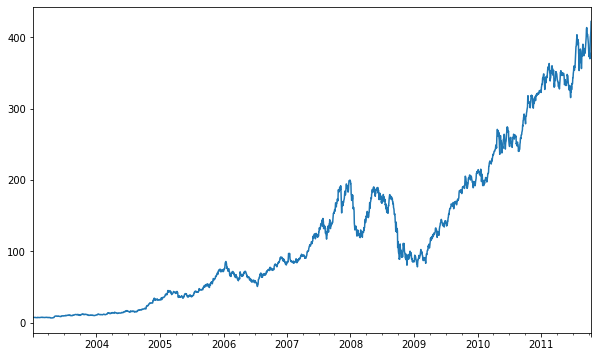

In [426]:
close_px.AAPL.plot()

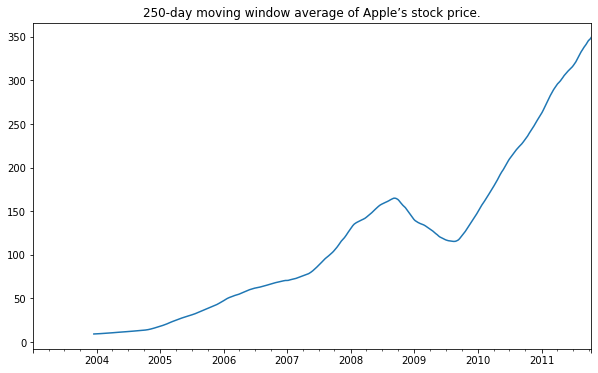

In [427]:
# rolling operator, which behaves similarly to resample and groupby. 
#It can be called on a Series or DataFrame along with a window (expressed as
# a number of periods(250))
close_px.AAPL.rolling(250).mean().plot(title="250-day moving window average of Apple’s stock price.")

The expression rolling(250) is similar in behavior to groupby , but instead of grouping, it creates an object that enables grouping over a 250-day sliding window.

In [407]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

By default rolling functions require all of the values in the window to be non-NA.
This behavior can be changed to account for missing data and, in particular, the fact
that you will have fewer than window periods of data at the beginning of the time
series

In [408]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

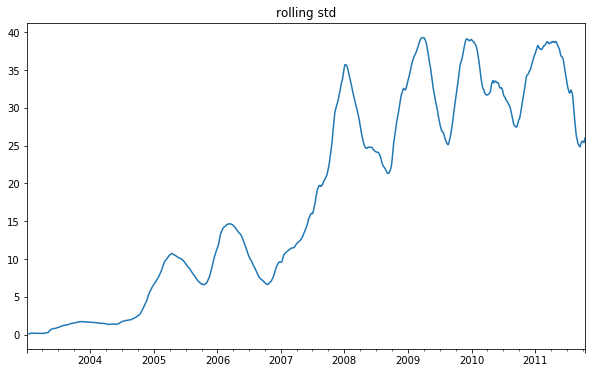

In [437]:
appl_std250.plot(title="rolling std")

expanding mean starts the time window from the beginning of the
time series and increases the size of the window until it encompasses the whole series.

In [430]:
expanding_mean = appl_std250.expanding().mean()

In [431]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

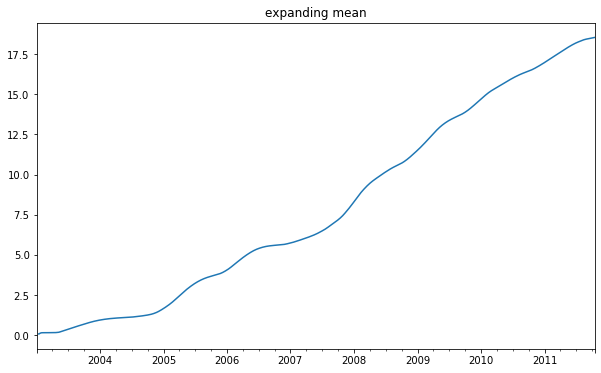

In [436]:
expanding_mean.plot(title="expanding mean")

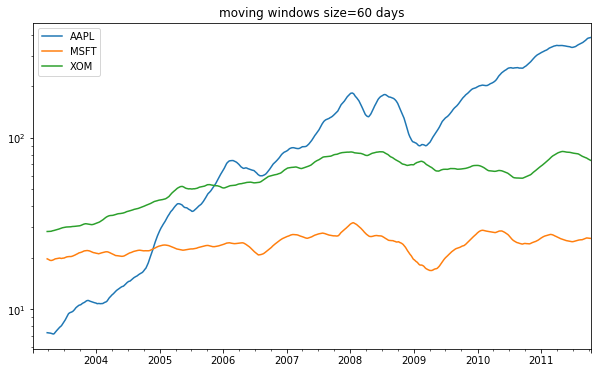

In [439]:
close_px.rolling(60).mean().plot(logy=True, title="moving windows size=60 days")#(log Y-axis) -> enlarge small number

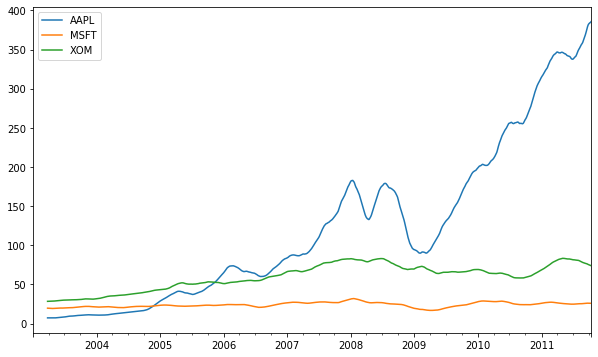

In [438]:
close_px.rolling(60).mean().plot()

In [413]:
#string indicating a fixed-size time offset rather than a set number of periods.
close_px.rolling('20D').mean() 

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions:  aapl_px.ewm(span=30).mean()
* specify a constant decay factor to give more weight to more recent observations.
* exponentially weighted statistic places more weight on more recent observations, it “adapts” faster to changes compared with the equal-weighted version.

In [414]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

span:  “N-day EW moving average”.

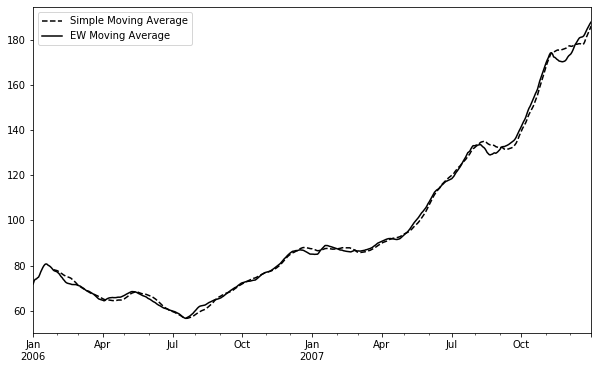

In [440]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean() #Exponentially Weighted
ma60.plot(style='k--', label='Simple Moving Average') 
ewma60.plot(style='k-', label='EW Moving Average')
plt.legend()

### Binary Moving Window Functions
* a stock’s correlation to a benchmark index like the S&P 500.
* correlation and covariance, need to operate on two
time series.

In [416]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [457]:
# close_px_all.head()
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [458]:
#test
close_px_all_pct_chg = close_px_all.pct_change()
close_px_all_pct_chg

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [448]:
spx_px = close_px_all['SPX']
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [447]:
spx_rets = spx_px.pct_change()
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [449]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [456]:
returns = close_px.pct_change()
# returns.head()
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


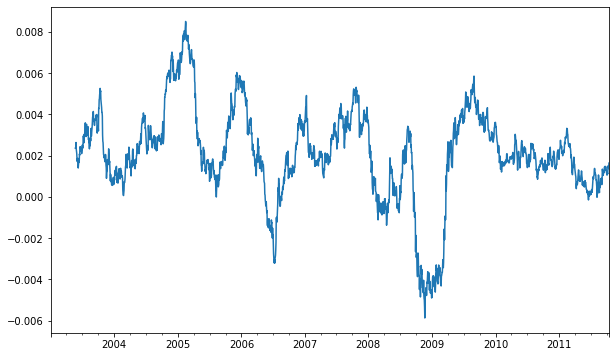

In [452]:
#test : AAPL 
returns.AAPL.rolling(125, min_periods=100).mean().plot()

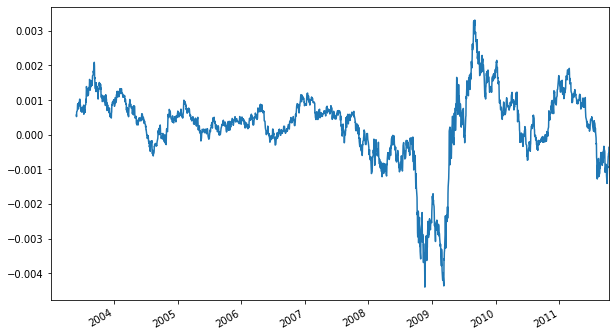

In [459]:
#test :spx
close_px_all_pct_chg.SPX.rolling(125, min_periods=100).mean().plot()

#### sum over # all the windows in our data frame 

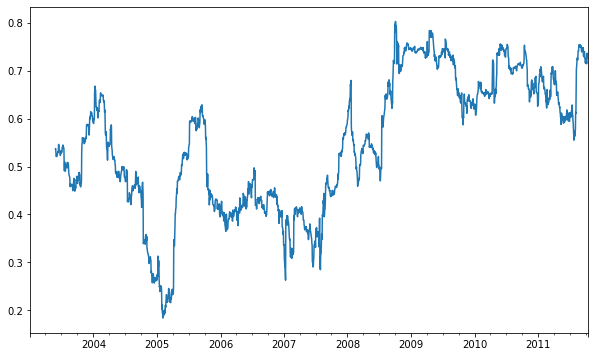

In [418]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets) #AAPL pct change -> CORR <- SPX pct change 
corr.plot()

In [419]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

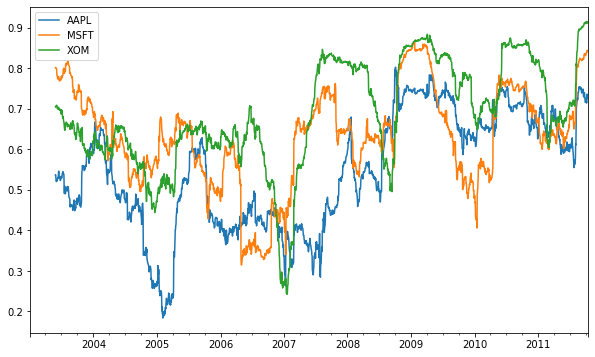

In [420]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions
* The apply method on rolling and related methods provides a means to apply an
array function of your own devising over a moving window.

In [421]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

/home/ys/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


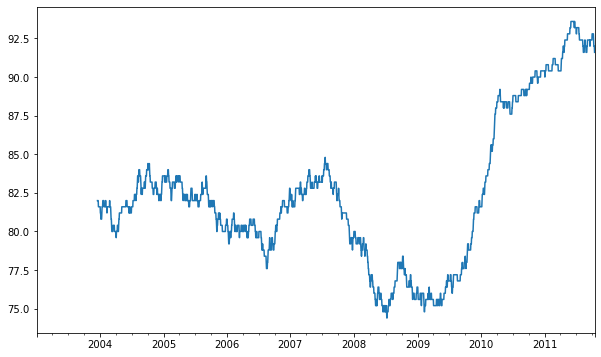

In [422]:
from scipy.stats import percentileofscore
#the percentile rank of a particular value over the sample.
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [423]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion